In [14]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Supply_chain_data_updated.csv")

# Check the first few rows
display(df.head())

# Basic info
print(df.info())

# Summary stats
print(df.describe(include='all'))


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Promotion,Date,ProductID,EconomicIndicators,Weather
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,NaN,2016-01-21,HC001,107.15,Cloudy
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,NaN,2016-01-22,SK001,110.17,Cloudy
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,Discount10,2016-01-23,HC002,106.17,Cloudy
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,Discount10,2016-01-24,SK002,116.05,Sunny
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,FlashSale,2016-01-25,SK003,97.29,Rainy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
#Step 1: Data Preparation

In [15]:
#Handle Missing Values

#Option 1: Fill with mode
df['Promotion'].fillna(df['Promotion'].mode()[0], inplace=True)

#Option 2: Add a new category
df['Promotion'].fillna('NoPromo', inplace=True)


C:\Users\jianl\AppData\Local\Temp\ipykernel_12536\4217407310.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promotion'].fillna(df['Promotion'].mode()[0], inplace=True)


In [16]:
#Convert dates

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)


In [17]:
#Encode Categorical Variables

categorical_cols = [
    'Product type', 'Customer demographics', 'Shipping carriers',
    'Supplier name', 'Location', 'Inspection results', 
    'Transportation modes', 'Routes', 'Promotion', 'Weather'
]

df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
    


In [18]:
#Drop Unnecessary Columns

#df_encoded.drop(columns=['SKU', 'ProductID', 'Date'], inplace=True)
df_encoded.drop(columns=['SKU', 'ProductID', 'Date'], inplace=True, errors='ignore')



In [19]:
#Scale numerical Features (optional but helpful for linear models)


from sklearn.preprocessing import StandardScaler

numerical_cols = df_encoded.select_dtypes(include = ['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'Number of products sols']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [19]:
#Step 2: Exploratory Data Analysis (EDA)

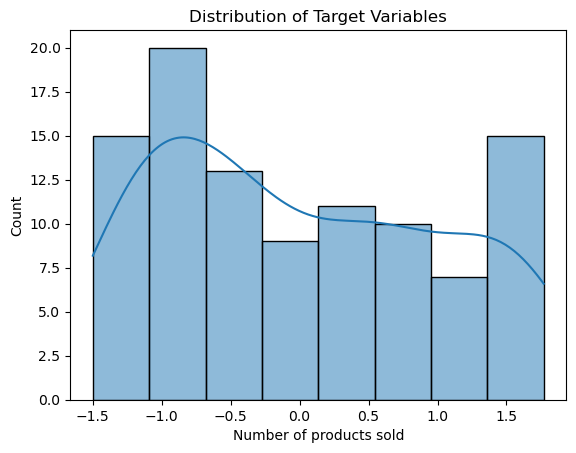

In [20]:
#Target Variable Analysis


import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_encoded['Number of products sold'], kde=True)
plt.title("Distribution of Target Variables")
plt.show()

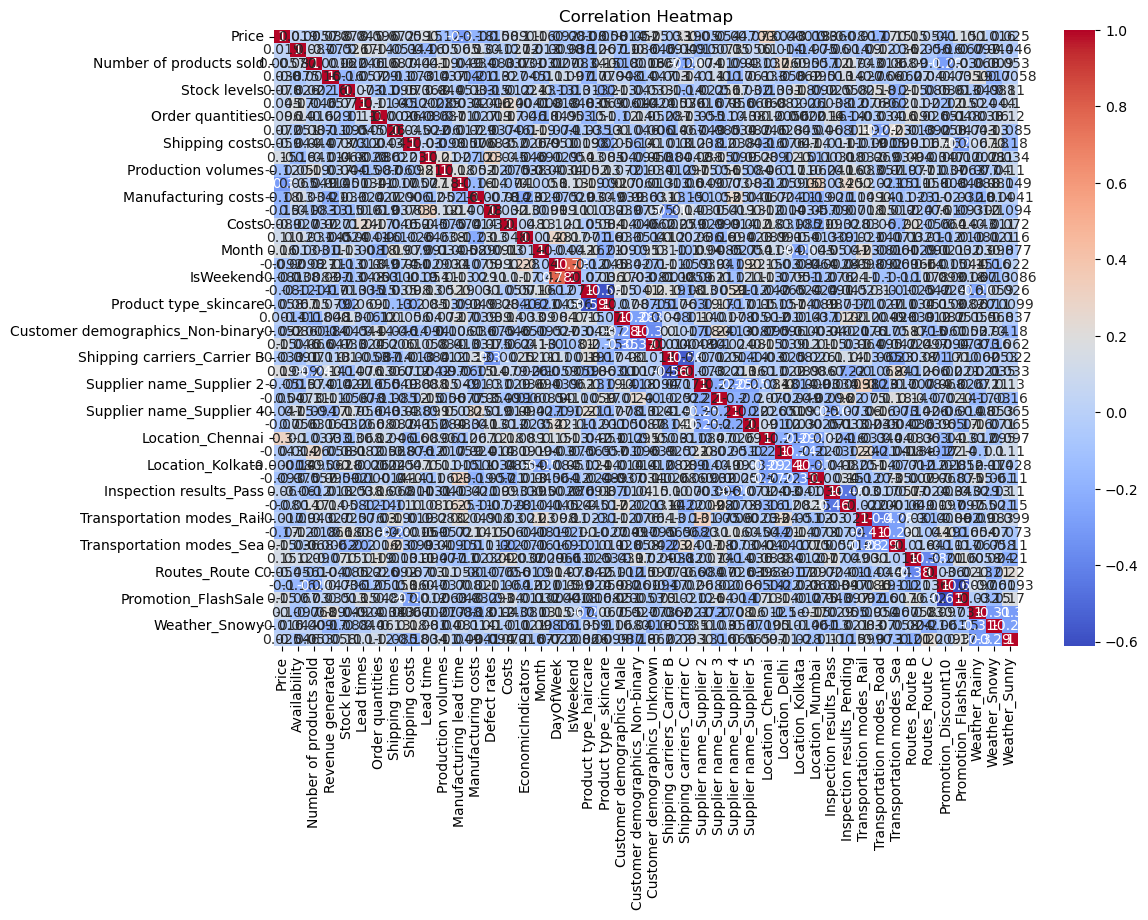

In [21]:
#Correlation Heatmap


plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


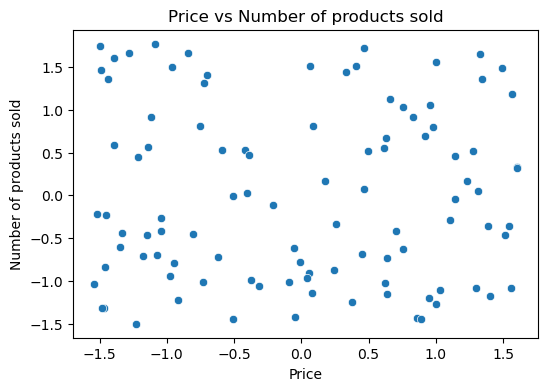

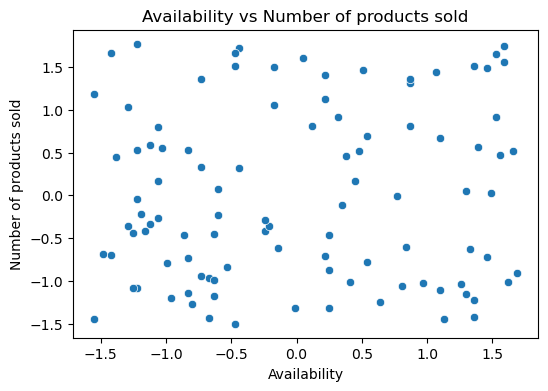

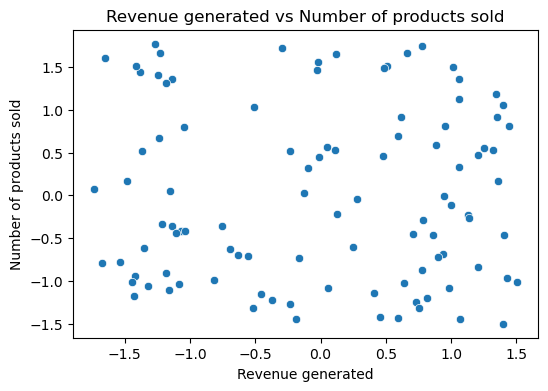

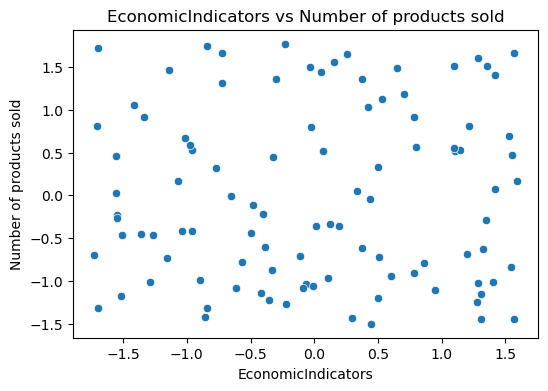

In [22]:
#Top Features vs Target



top_features = ['Price', 'Availability', 'Revenue generated', 'EconomicIndicators']

for col in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_encoded[col], y=df_encoded['Number of products sold'])
    plt.title(f"{col} vs Number of products sold")
    plt.show()


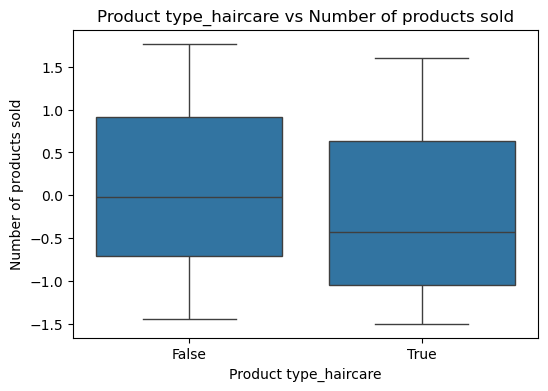

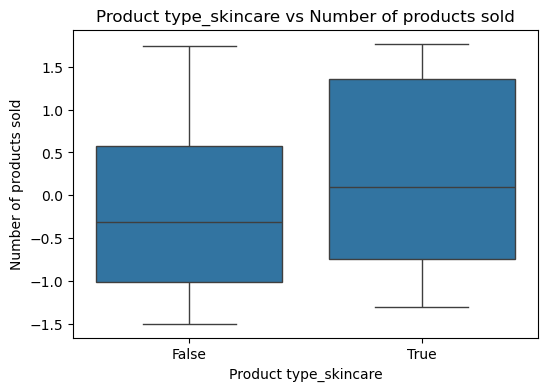

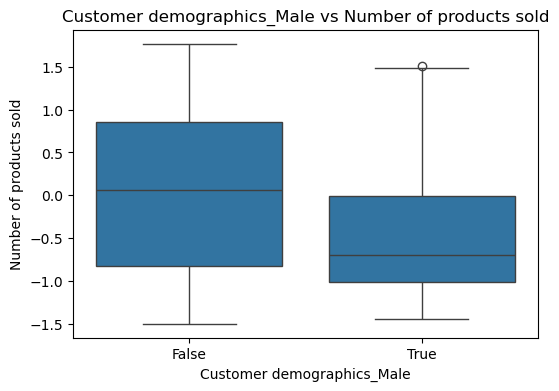

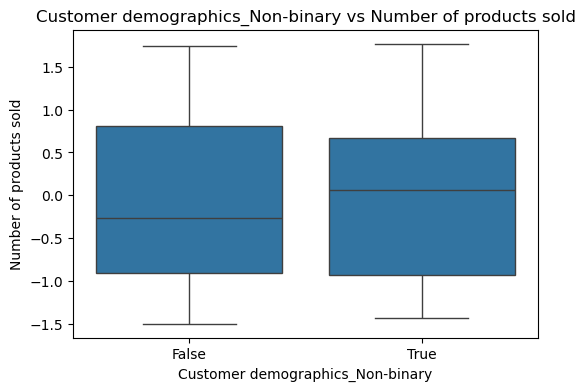

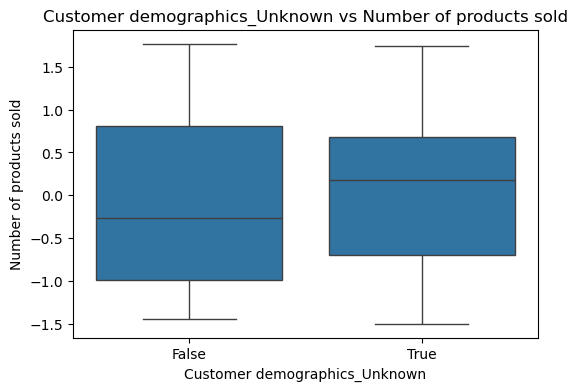

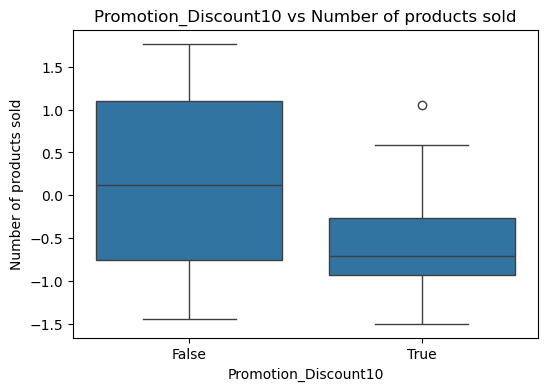

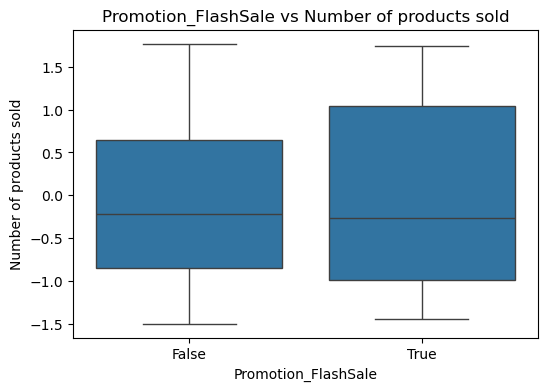

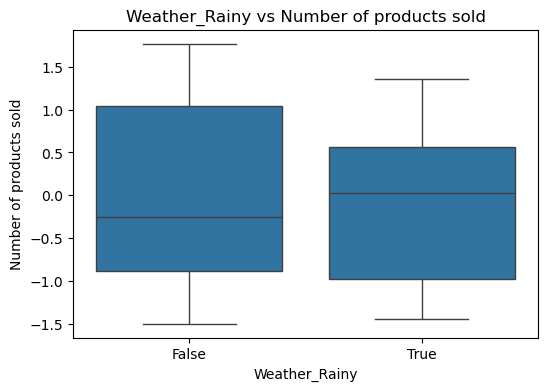

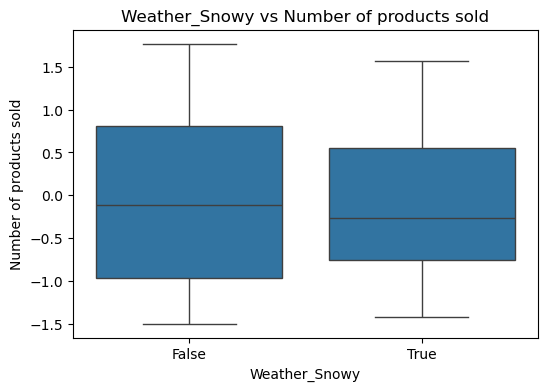

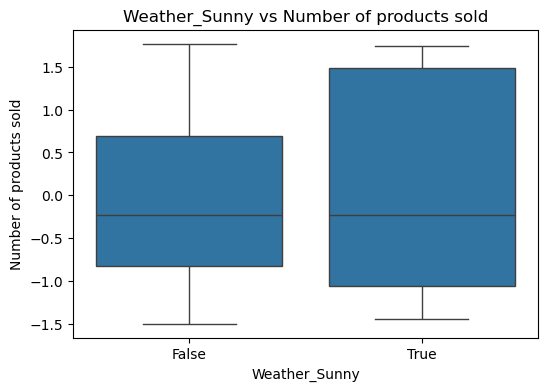

In [23]:
#Categorical Impact on Target

one_hot_columns = [
    'Product type_haircare', 'Product type_skincare',
    'Customer demographics_Male', 'Customer demographics_Non-binary',
    'Customer demographics_Unknown',
    'Promotion_Discount10', 'Promotion_FlashSale',
    'Weather_Rainy', 'Weather_Snowy', 'Weather_Sunny'
]

for col in one_hot_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded[col], y=df_encoded['Number of products sold'])
    plt.title(f"{col} vs Number of products sold")
    plt.show()



In [25]:
print(df_encoded.columns)


Index(['Price', 'Availability', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping costs', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs', 'EconomicIndicators', 'Month', 'DayOfWeek', 'IsWeekend',
       'Product type_haircare', 'Product type_skincare',
       'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Shipping carriers_Carrier B',
       'Shipping carriers_Carrier C', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5', 'Location_Chennai', 'Location_Delhi',
       'Location_Kolkata', 'Location_Mumbai', 'Inspection results_Pass',
       'Inspection results_Pending', 'Transportation modes_Rail',
       'Transportation modes_Road', 'Transportation modes_Sea',
       'Routes_Route B', 'Routes_

In [ ]:
#Step 3:Feature Engineering

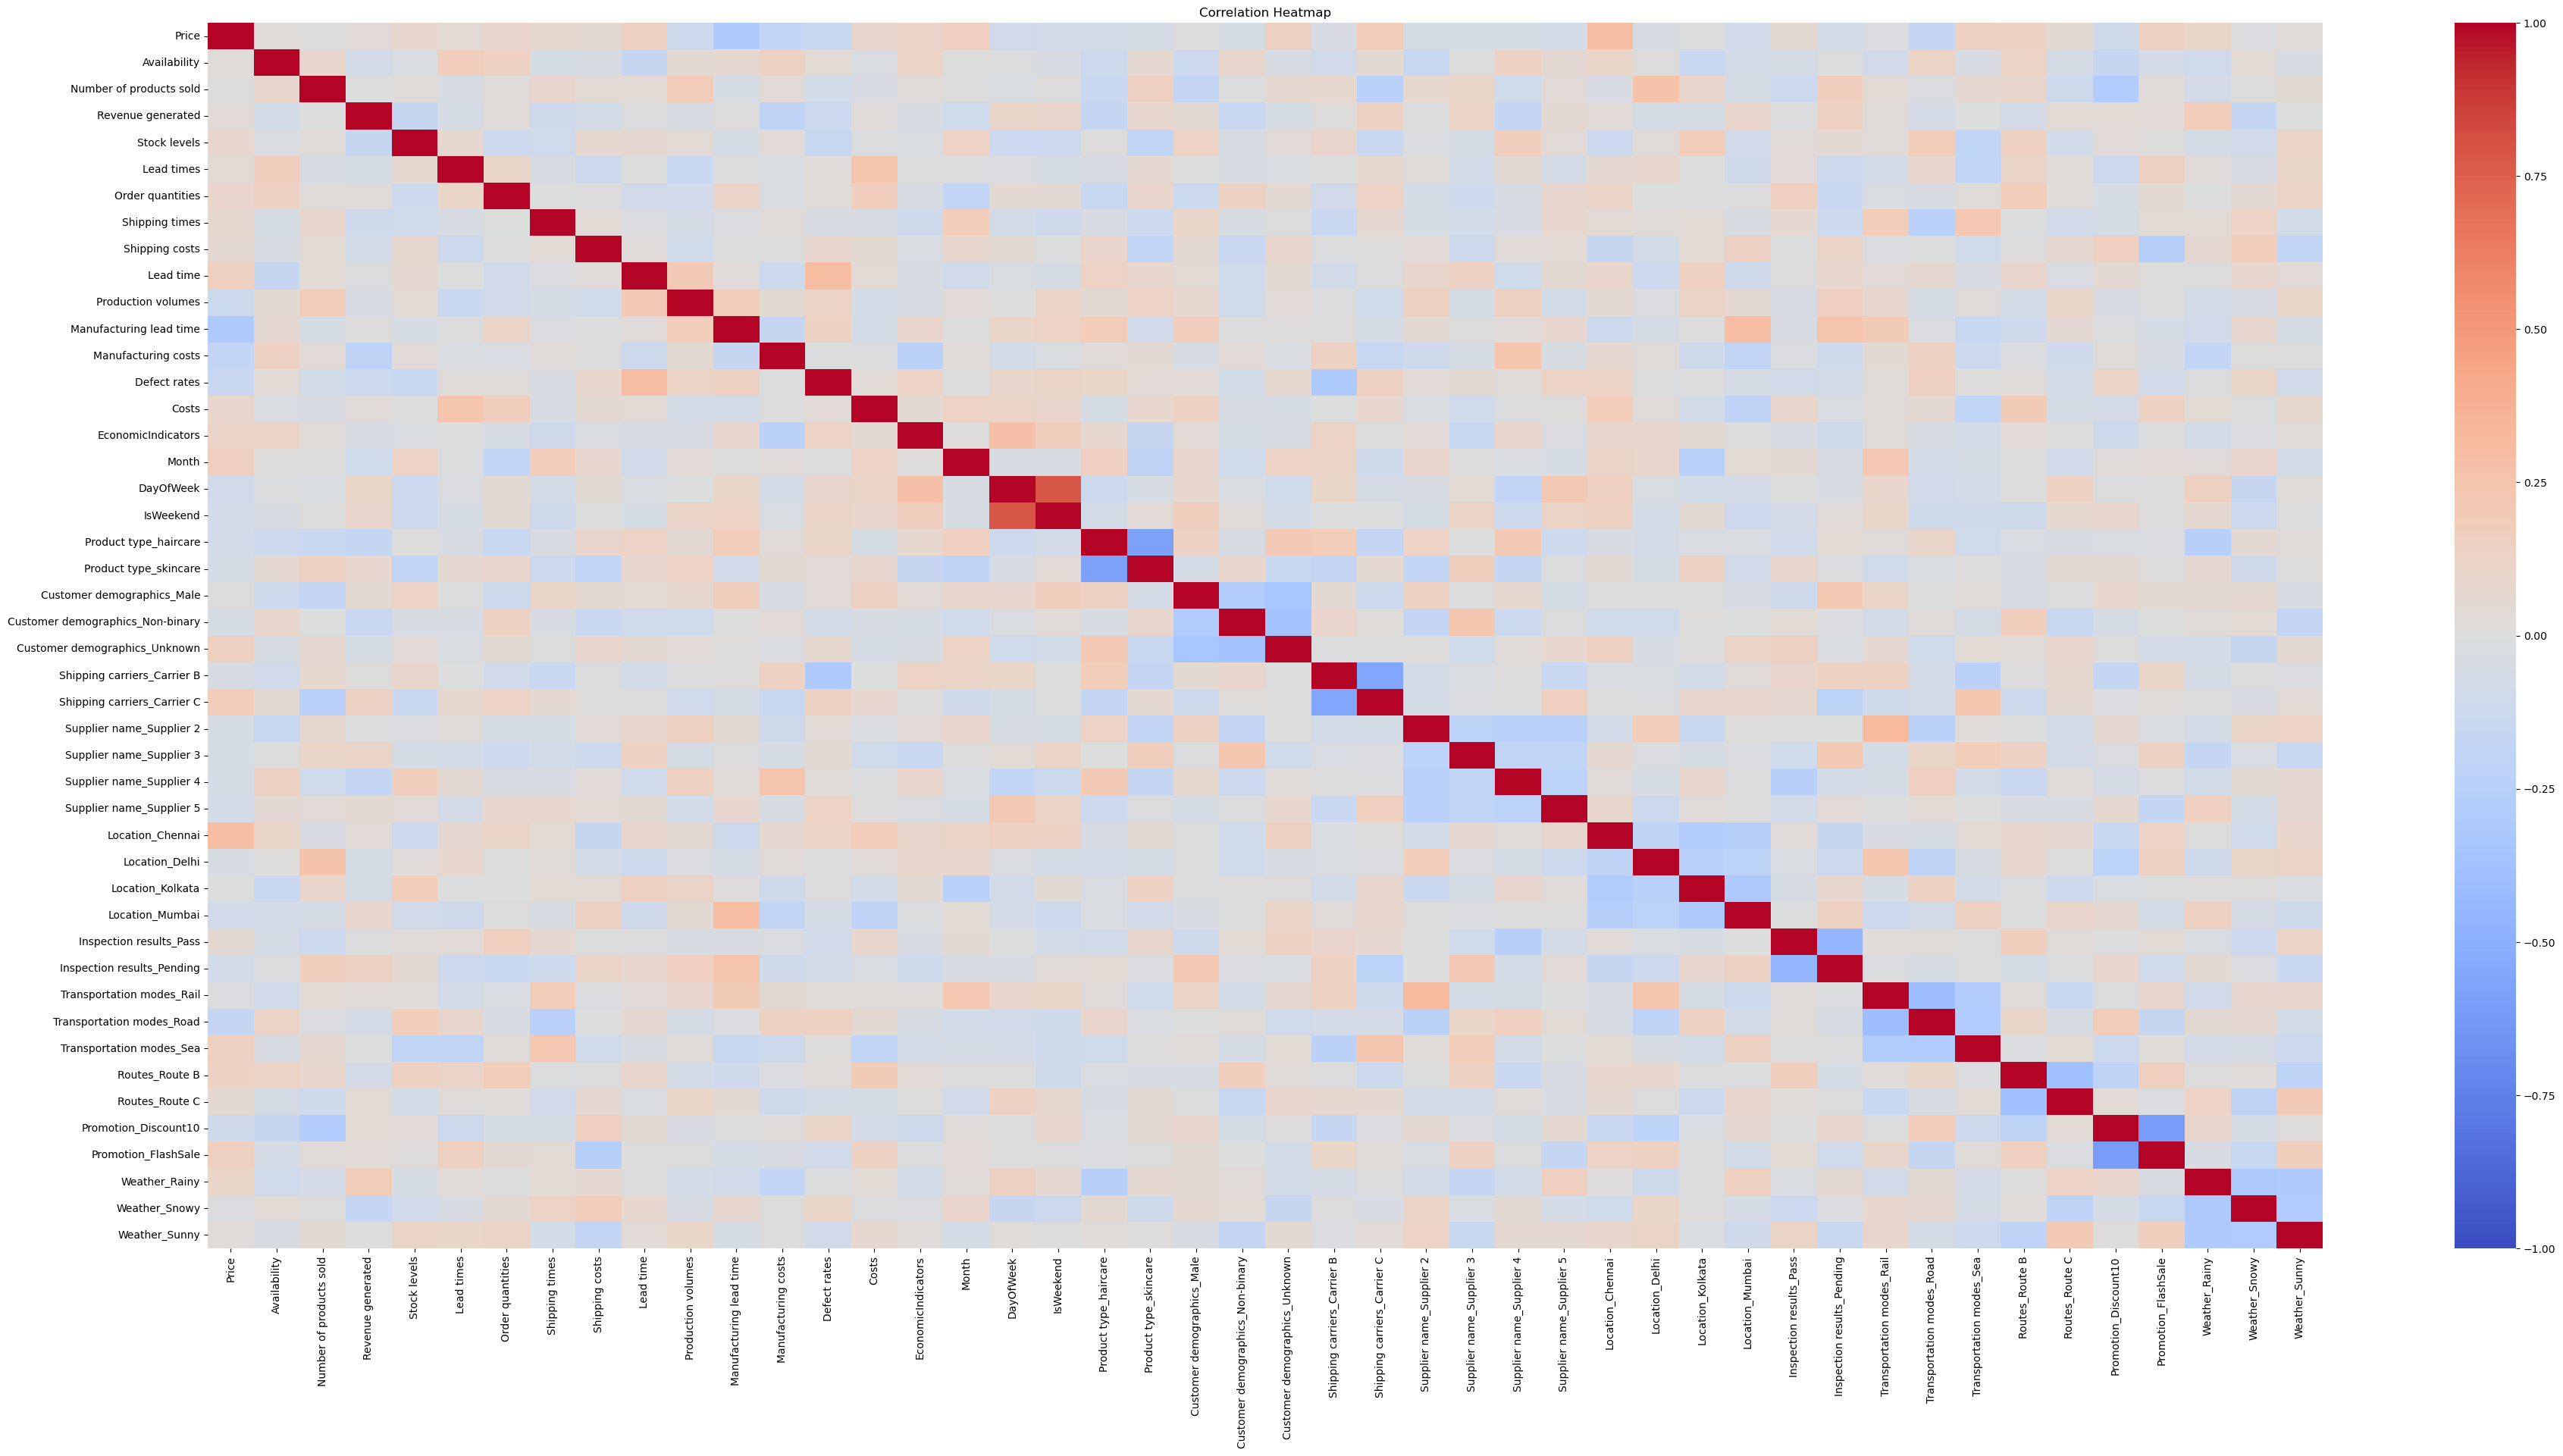

In [24]:
#Check for multicollinearity (Remove Highly Correlated Features)


plt.figure(figsize=(45, 21))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [28]:
#Step 4/6 : Model Building

In [30]:
#Define Features and Target


X = df_encoded.drop(columns=['Number of products sold']) #features
y = df_encoded['Number of products sold']               #target

In [32]:
#Split the Data


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [33]:
#Train Initial Models


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)



Linear Regression Evaluation:
RMSE: 1.61
R² Score: -1.47

Random Forest Evaluation:
RMSE: 1.33
R² Score: -0.68


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
#Step 5: Model Evaluation and Improvement

In [43]:
"""
1. Evaluate model performance clearly
Look at:

RMSE (Root Mean Squared Error) — lower is better

R² score — closer to 1.0 is better

You already reported:

Linear Regression: RMSE = 1.61, R² = -1.47

Random Forest: RMSE = 1.33, R² = -0.68
➜ Both models are underperforming (R² < 0 is very poor)."
"""

'\n1. Evaluate model performance clearly\nLook at:\n\nRMSE (Root Mean Squared Error) — lower is better\n\nR² score — closer to 1.0 is better\n\nYou already reported:\n\nLinear Regression: RMSE = 1.61, R² = -1.47\n\nRandom Forest: RMSE = 1.33, R² = -0.68\n➜ Both models are underperforming (R² < 0 is very poor)."\n'

In [51]:
#2. Improve your model with better algorithms

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")


XGBoost - RMSE: 1.37, R²: -0.79


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


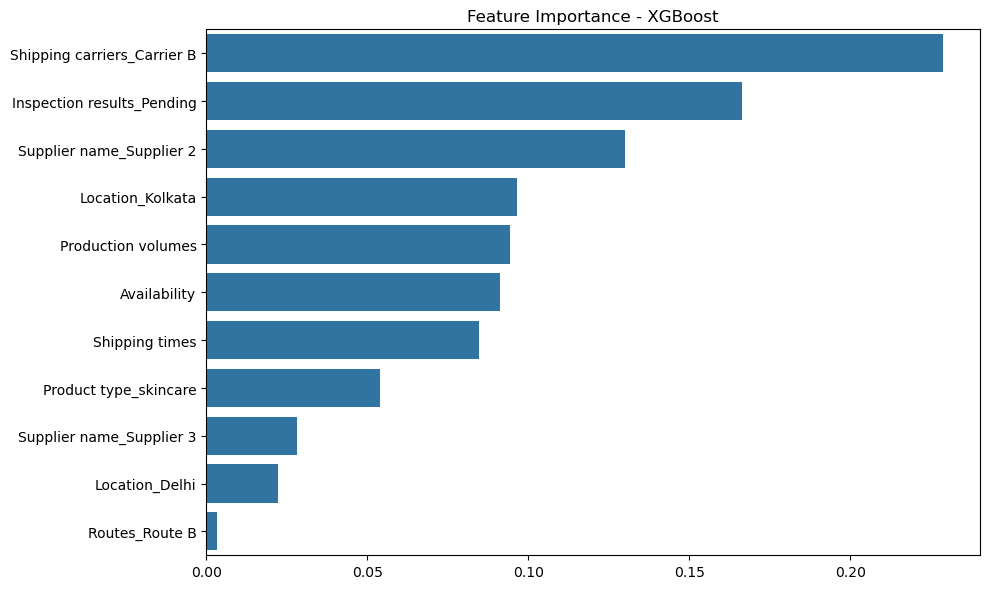

In [52]:
#3. (Optional but helpful) — Check Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()


In [53]:
#Step 6: Final Model Selection & Saving

In [55]:
#Save the Final Model


import joblib

# Save the trained model
joblib.dump(xgb, 'final_demand_forecasting_model.pkl')
print("✅ Model saved as 'final_demand_forecasting_model.pkl'")


✅ Model saved as 'final_demand_forecasting_model.pkl'


In [57]:
-----------------------------------------------------------------------
import joblib

# Load the saved model
model = joblib.load('final_demand_forecasting_model.pkl')

# Now you can use it to predict
y_pred = model.predict(X_test)


In [56]:
#(Optional) Load the Model Later


# To load the saved model
loaded_model = joblib.load('final_demand_forecasting_model.pkl')

# Example: Predict using loaded model
predictions = loaded_model.predict(X_test)


In [58]:
#Model Evaluation

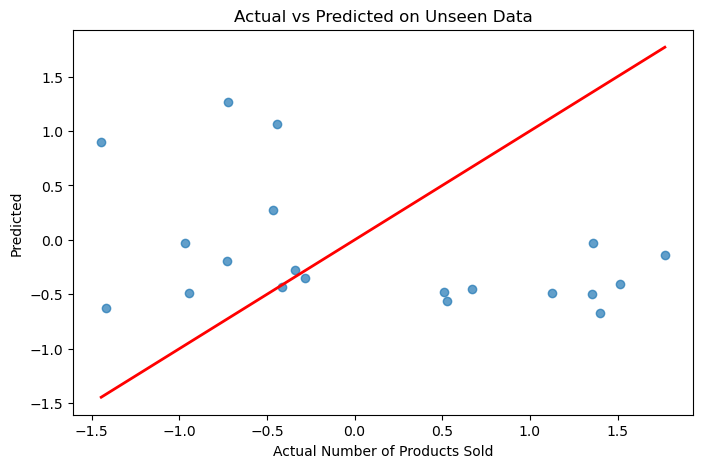

In [59]:
#5. Visualize Prediction vs Actual (Optional)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Number of Products Sold")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted on Unseen Data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()


In [60]:
# Bonus: Save Test Results (Optional)


import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df.to_csv("unseen_data_predictions.csv", index=False)
